# Python<img src='https://developers.redhat.com/sites/default/files/styles/article_feature/public/blog/2014/09/python-logo.png?itok=NNQ6xBcf' align='after' width=180> for <img align='after' width='180' src='https://drive.google.com/uc?export=view&id=19qZe5VIxkIEm7_hYkrvlH142XPBxBaEf'> 
 # Data manipulations for a possible resolution of the team assignment


---
> This notebook processes the data from the excel sheet from [canvas](https://canvas.uva.nl/courses/25016/files/folder/Tutorials/Data) in order to obtain the information that you may need to solve the team Assignment 1. Feel free to make a copy of this notebook and add the code of your resolution to it. 
---

In [ ]:
# DO NOT CHANGE
import sys
at_colab = "google.colab" in sys.modules

if at_colab:
    import shutil
    if not shutil.which("pyomo"):
        !pip install -q pyomo
        assert(shutil.which("pyomo"))

     |████████████████████████████████| 9.7 MB 5.7 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 


In [ ]:
import sys
if 'google.colab' in sys.modules:
    import os
    from google.colab import files
    # just check if we already uploaded, may we restart the runtime and run all cells
    if not os.path.isfile('Data Set Feedcalculator.xlsx'):
        uploaded = files.upload()

Saving Data Set Feedcalculator.xlsx to Data Set Feedcalculator.xlsx


In [ ]:
at_colab = "google.colab" in sys.modules
if at_colab:
    if not shutil.which('/usr/bin/glpsol'):
      !sudo apt install libglpk-dev python3.8-dev libgmp3-dev
      !pip install pyomo
      !apt install glpk-utils
      !pip install glpk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libamd2 libbtf1 libcamd2 libccolamd2 libcholmod3 libcolamd2 libcxsparse3
  libglpk40 libgmp-dev libgmp10 libgmpxx4ldbl libgraphblas1 libklu1 libldl2
  libmetis5 libpython3.8 libpython3.8-dev libpython3.8-minimal
  libpython3.8-stdlib librbio2 libspqr2 libsuitesparse-dev
  libsuitesparseconfig5 libumfpack5 python3.8 python3.8-minimal
Suggested packages:
  libiodbc2-dev gmp-doc libgmp10-doc libmpfr-dev python3.8-venv binfmt-support
The following NEW packages will be installed:
  libamd2 libbtf1 libcamd2 libccolamd2 libcholmod3 libcolamd2 libcxsparse3
  libglpk-dev libglpk40 libgmp-dev libgmp3-dev libgmpxx4ldbl libgraphblas1
  libklu1 libldl2 libmetis5 libpython3.8 libpython3.8-dev libpython3.8-minimal


In [ ]:
if 'google.colab':
    if not shutil.which('/usr/bin/cbc'):
        !apt-get install -y -qq coinor-cbc
        assert(shutil.which('/usr/bin/cbc'))

Selecting previously unselected package coinor-libcoinutils3v5.
(Reading database ... 125140 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.10.14+repack1-1_amd64.deb ...
Unpacking coinor-libcoinutils3v5 (2.10.14+repack1-1) ...
Selecting previously unselected package coinor-libosi1v5.
Preparing to unpack .../1-coinor-libosi1v5_0.107.9+repack1-1_amd64.deb ...
Unpacking coinor-libosi1v5 (0.107.9+repack1-1) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.16.11+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.16.11+repack1-1) ...
Selecting previously unselected package coinor-libcgl1.
Preparing to unpack .../3-coinor-libcgl1_0.59.10+repack1-1_amd64.deb ...
Unpacking coinor-libcgl1 (0.59.10+repack1-1) ...
Selecting previously unselected package coinor-libcbc3.
Preparing to unpack .../4-coinor-libcbc3_2.9.9+repack1-1_amd64.deb ...
Unpacking coinor-libcbc3 (2.9.9+repack1-1) ...
Selecting p

In [ ]:
import pandas as pd
import pyomo.environ as pyo
import matplotlib.pyplot as plt

# Read the data, as you have already seen [here]( https://colab.research.google.com/drive/1Q3fNgpa8QfGTzJ7lj-oZ8Ya0IIGCdnEr).

In [ ]:
import pandas as pd
data = pd.read_excel('Data Set Feedcalculator.xlsx',sheet_name=None)

In [ ]:
ingredients      = data['Ingredient Database']
nutrient_rules   = data['Nutrient Rules']
ingredient_rules = data['Ingredient Rules']

# Collect the ingredients that are available together with the relevant columns

In [ ]:
available_ingredients = ingredients[ingredients.Availability][['Name','Reference name','Price']+list(nutrient_rules.Nutrient)].set_index('Reference name')
available_ingredients

,Name,Price,oebr,cp,cfibre,staew,ca,na,opp,dlysp,dmetp,dmcp,dthrp,dtryp,dvalp,dargp
Reference name,,,,,,,,,,,,,,,,
barley,Barley,0.26,2656.5,99.7,43.4,539.3,0.4,0.1,1.2,2.3,1.3,2.9,2.3,0.9,3.6,3.9
blood,Blood meal 80% CP,0.71,2450.0,800.0,10.0,0.0,0.5,5.8,1.3,51.3,6.9,13.8,25.4,8.7,49.6,24.8
boneash,Bone ash,0.18,0.0,0.0,0.0,0.0,289.3,9.5,82.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cotton,Cotton seed cake,0.20,1730.0,362.9,169.8,33.6,2.2,0.0,3.1,8.8,3.9,8.1,8.0,3.2,11.8,32.7
fish,Fish meal 56% CP,0.63,2862.0,563.0,0.0,0.0,60.0,10.5,19.6,38.5,14.3,18.8,20.1,5.6,32.3,30.6
fishlq,Fish meal 40% CP,0.55,0.0,384.0,0.0,0.0,141.0,10.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gnseeds,Groundnut seeds,0.59,5243.0,287.1,23.3,0.0,1.0,0.0,1.7,7.5,2.8,5.9,5.8,2.4,9.5,28.1
maize,Maize/ Corn,0.33,3227.8,76.3,20.8,648.5,0.1,0.0,0.7,1.4,1.4,2.7,2.1,0.4,2.9,3.1
maizebranhighq,"Maize bran, high quality",0.19,2893.4,90.6,39.6,489.3,1.3,0.2,1.4,1.8,1.6,3.1,2.4,0.5,3.8,3.9


# Collect the nutrient bounds

Note that 'not available' in a data frame is not the same as None!

In [ ]:
nutrient_bounds = { nut : (lb if not pd.isna(lb) else 0,     # no lower bound translates into 0 as lower bound
                           ub if not pd.isna(ub) else None)  # no upper bound becomes None
                    for nut,lb,ub in zip(nutrient_rules.Nutrient,nutrient_rules['Lower Bound'],nutrient_rules['Upper Bound']) 
                  }

In [ ]:
nutrient_bounds

{'oebr': (2750.0, 2850.0),
 'cp': (155.0, 195.0),
 'cfibre': (0, 75.0),
 'staew': (300.0, None),
 'ca': (7.0, 9.0),
 'na': (1.4, 2.1),
 'opp': (3.5, None),
 'dlysp': (6.7, 7.9),
 'dmetp': (2.8, None),
 'dmcp': (5.1, 6.1),
 'dthrp': (4.5, None),
 'dtryp': (1.3, None),
 'dvalp': (5.4, None),
 'dargp': (7.0, None)}

# Collect the ingredient bounds

Note again that 'not available' in a data frame is not the same as None!

In [ ]:
ingredient_bounds = { ing : (lb if not pd.isna(lb) else 0,    # no lower bound translates into 0 as lower bound
                             ub if not pd.isna(ub) else None) # no upper bound becomes None
                      for ing,lb,ub in zip(ingredient_rules.Ingredient,ingredient_rules['Lower Bound'],ingredient_rules['Upper Bound']) }

In [ ]:
ingredient_bounds

{'barley': (0, 0.1),
 'blood': (0, 0.03),
 'boneash': (0, 0.03),
 'mbmeal': (0, 0.05),
 'mbmeal2': (0, 0.08),
 'cotton': (0, 0.06),
 'copra': (0, 0.07),
 'fats': (0, 0.05),
 'fish': (0, 0.07),
 'fishlq': (0, 0.07),
 'maize': (0.2, None),
 'maizebranhighq': (0, 0.25),
 'maizebranlowq': (0, 0.15),
 'sugars': (0, 0.01),
 'rapecake': (0, 0.06),
 'rapemeal': (0, 0.06),
 'rice': (0, 0.15),
 'gnseeds': (0, 0.1),
 'gncake': (0, 0.08),
 'soybeanexp': (0, 0.07),
 'soybeanmeal': (0, 0.32),
 'soybeanmealhp': (0, 0.33),
 'soybeanheat': (0, 0.3),
 'sunflower': (0, 0.12),
 'sesamecake': (0, 0.12),
 'wheat': (0, 0.25),
 'wheatbran': (0, 0.08),
 'tapbran': (0, 0.2),
 'caswhole': (0, 0.25),
 'casfine': (0, 0.25),
 'cascoarse': (0, 0.15),
 'sunflowerseeds': (0, 0.12),
 'lime': (0, 0.02),
 'salt': (0, 0.003)}

# Collect the combined ingredient rules

This is slightly more complex, as we need to know where this data is placed in the sheet, hence the data frame. 
Note how we use `.dropna()` on series to leave only the values defined. 
Note as well how we filter the ingredients that are not available. 
It may happen that a combined rule disappears, because it did only relate to not available ingredients. 

If you want to know where the `Unnamed: ` columns are comming from, just examine the `ingredient_rules` data frame. 


In [ ]:
combined_ingredient_rules   = [] 
set_of_availabe_ingredients = set(available_ingredients.index)
for c in ['Unnamed: '+str(i) for i in range(5,13)]:
    aux = ingredient_rules[[c]].dropna().values
    aux = [ v[0] for v in aux ]
    upperbound          = aux[0]
    ingredients_in_rule = set(aux[1:]).intersection(set_of_availabe_ingredients)
    if ingredients_in_rule:
        combined_ingredient_rules.append((upperbound,ingredients_in_rule))
combined_ingredient_rules

[(0.17, {'cotton', 'sunflower'}),
 (0.35, {'soybeanexp', 'soybeanmeal'}),
 (0.3, {'barley'}),
 (0.25, {'maizebranhighq', 'maizebranlowq'}),
 (0.07, {'fish', 'fishlq'}),
 (0.08, {'mbmeal'}),
 (0.25, {'casfine', 'caswhole', 'tapbran'})]

In [ ]:
from pyomo.core.base.objective import minimize
from pyomo.core.base.set_types import Boolean
from pyomo.opt.base.solvers import SolverFactory

def question_1(available_ingredients, nutrient_rules, ingredient_bounds, nutrient_bounds, combined_ingredient_rules):
  ### Define model
  hanoi = pyo.ConcreteModel()
  ### Define variable
  hanoi.I = pyo.Set(initialize = available_ingredients.index)
  hanoi.N = pyo.Set(initialize = list(nutrient_bounds.keys ()))
  hanoi.X = pyo.Var(hanoi.I, within = pyo.NonNegativeReals)
  hanoi.X = pyo.Var(hanoi.I, within=pyo.NonNegativeReals)
  hanoi.H = list(range(len(combined_ingredient_rules)))

  ### Define optimized fraction
  hanoi.x_percent = pyo.Var(hanoi.I, within = pyo.PercentFraction) 

  ### Define ingredient bound rule
  def required_ingredients_rule( hanoi, y):
    return (ingredient_bounds[y][0], (hanoi.x_percent[y]), ingredient_bounds[y][1])
  hanoi.ingredient_bounds = pyo.Constraint(list(set(list(available_ingredients.index.values)) & set(list(ingredient_bounds.keys ()))), rule = required_ingredients_rule)

  ### Define nutrient bound rule
  def required_nutrients_rule( hanoi, x ):
    return (nutrient_bounds[x][0], pyo.quicksum( hanoi.x_percent[i]*available_ingredients.at[i,x] for i in hanoi.I ), nutrient_bounds[x][1])
  hanoi.nutrient_bounds = pyo.Constraint( nutrient_bounds.keys(), rule = required_nutrients_rule )

  ### Define combined ingredient rule
  hanoi.combined_ingredient_rules = pyo.ConstraintList()
  for j in combined_ingredient_rules:
    hanoi.combined_ingredient_rules.add(expr = pyo.quicksum(hanoi.x_percent[i]for i in j[1]) <= j[0])
  hanoi.cir = pyo.Constraint(expr = pyo.quicksum(hanoi.x_percent[i] for i in hanoi.I) == 1)

  ### Define objective
  hanoi.cost_minimize = pyo.Objective(expr = pyo.quicksum( available_ingredients['Price'][i] * hanoi.x_percent[i] for i in hanoi.I )
                          , sense=pyo.minimize)

  return hanoi

answer_1 = question_1(available_ingredients, nutrient_rules, ingredient_bounds, nutrient_bounds, combined_ingredient_rules)
answer_1.pprint()


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


5 Set Declarations
    I : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   26 : {'barley', 'blood', 'boneash', 'cotton', 'fish', 'fishlq', 'gnseeds', 'maize', 'maizebranhighq', 'maizebranlowq', 'mbmeal', 'sugars', 'soybeanexp', 'soybeanmeal', 'sunflower', 'sunflowerseeds', 'tapbran', 'caswhole', 'casfine', 'wheatbran', 'lysine', 'dl', 'ltryp', 'dicaph', 'shells', 'salt'}
    N : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   14 : {'oebr', 'cp', 'cfibre', 'staew', 'ca', 'na', 'opp', 'dlysp', 'dmetp', 'dmcp', 'dthrp', 'dtryp', 'dvalp', 'dargp'}
    combined_ingredient_rules_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    7 : {1, 2, 3, 4, 5, 6, 7}
    ingredient_bounds_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        N

In [ ]:
answer_1 = question_1(available_ingredients, nutrient_rules, ingredient_bounds, nutrient_bounds, combined_ingredient_rules)
results = SolverFactory('glpk').solve(answer_1)
print(answer_1.cost_minimize())

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


0.26976438938005975


In [ ]:
from pyomo.core.base.objective import minimize
from pyomo.core.base.set_types import Boolean
from pyomo.opt.base.solvers import SolverFactory

def question_2(available_ingredients, nutrient_rules, ingredient_bounds, nutrient_bounds, combined_ingredient_rules):
  ### Define model
  saigon = pyo.ConcreteModel()

  ### Define variable
  saigon.I = pyo.Set(initialize =  available_ingredients.index)
  saigon.N = pyo.Set(initialize = list(nutrient_bounds.keys ()))
  saigon.X = pyo.Var(saigon.I, within=pyo.NonNegativeReals)
  saigon.H = list(range(len(combined_ingredient_rules)))

  ### Define optimized fraction and percentage
  saigon.x_percent = pyo.Var(saigon.I, within = pyo.PercentFraction)
  saigon.y_binary = pyo.Var(saigon.I, within = pyo.Boolean)

  ### Define model objective
  saigon.ingredient_minimize = pyo.Objective(expr = pyo.quicksum(saigon.y_binary[i] for i in saigon.I), sense = pyo.minimize)

  ### Define ingredient bound rules
  def required_ingredients_rule( saigon, y):
    return (ingredient_bounds[y][0], (saigon.x_percent[y]), ingredient_bounds[y][1])
  saigon.ingredient_bounds = pyo.Constraint(list(set(list(available_ingredients.index.values)) & set(list(ingredient_bounds.keys ()))), rule = required_ingredients_rule)

  ### Define nutrient bound rules
  def required_nutrients_rule( saigon, x ):
    return (nutrient_bounds[x][0], pyo.quicksum( saigon.x_percent[i]*available_ingredients.at[i,x] for i in saigon.I ), nutrient_bounds[x][1])
  saigon.nutrient_bounds = pyo.Constraint( nutrient_bounds.keys(), rule = required_nutrients_rule )

  ### Define combined ingredient rules
  saigon.combined_ingredient_rules = pyo.ConstraintList()
  for j in combined_ingredient_rules:
    saigon.combined_ingredient_rules.add(expr = pyo.quicksum(saigon.x_percent[i]for i in j[1]) <= j[0])
  saigon.cir = pyo.Constraint(expr = pyo.quicksum(saigon.x_percent[i] for i in saigon.I) == 1)
  
  saigon.bp=pyo.ConstraintList()
  for i in saigon.I:
    saigon.bp.add(expr = saigon.y_binary[i] >= saigon.x_percent[i])
  return saigon

answer_2 = question_2(available_ingredients, nutrient_rules, ingredient_bounds, nutrient_bounds, combined_ingredient_rules)
results = SolverFactory('glpk').solve(answer_2)
print(answer_2.ingredient_minimize())



5.0


In [ ]:

from numpy import number
from pyomo.core.base.objective import minimize
from pyomo.core.base.set_types import Boolean
from pyomo.opt.base.solvers import SolverFactory

def question_3(num):
  ### Define model
  danang = pyo.ConcreteModel('danang')
  ### Define variable
  danang.I = pyo.Set(initialize = available_ingredients.index)
  danang.N = pyo.Set(initialize = list(nutrient_bounds.keys ()))
  danang.X = pyo.Var(danang.I, within=pyo.NonNegativeReals)
  danang.H = list(range(len(combined_ingredient_rules)))


  
  ### Define optimized fraction and percentage
  danang.x_percent = pyo.Var(danang.I, within =pyo.PercentFraction)
  danang.y_binary = pyo.Var(danang.I, within = pyo.Boolean)

  ### Define objective 
  danang.cost_minimize = pyo.Objective(expr = pyo.quicksum( available_ingredients['Price'][i] * danang.x_percent[i] for i in danang.I )
                          , sense=pyo.minimize)
  
  ### Define ingredient bound rules
  def required_ingredients_rule( danang, y):
    return (ingredient_bounds[y][0], (danang.x_percent[y]), ingredient_bounds[y][1])
  danang.ingredient_bounds = pyo.Constraint(list(set(list(available_ingredients.index.values)) & set(list(ingredient_bounds.keys ()))), rule = required_ingredients_rule)


  ### Define nutrient bound rules
  def required_nutrients_rule( danang, x ):
    return (nutrient_bounds[x][0], pyo.quicksum( danang.x_percent[i]*available_ingredients.at[i,x] for i in danang.I ), nutrient_bounds[x][1])
  danang.nutrient_bounds = pyo.Constraint( nutrient_bounds.keys(), rule = required_nutrients_rule )

  ### Define combined ingredient rules
  danang.combined_ingredient_rules = pyo.ConstraintList()
  for j in combined_ingredient_rules:
    danang.combined_ingredient_rules.add(expr = pyo.quicksum(danang.x_percent[i]for i in j[1]) <= j[0])
  danang.cir = pyo.Constraint(expr = pyo.quicksum(danang.x_percent[i] for i in danang.I) == 1)
  
  danang.bp=pyo.ConstraintList()
  for i in danang.I:
    danang.bp.add(expr = danang.y_binary[i] >= danang.x_percent[i])

  danang.bi = pyo.Constraint(expr = pyo.quicksum(danang.y_binary[i] for i in danang.I) == num )



  return danang

answer_3 = question_3(5)
results = SolverFactory('glpk').solve(answer_3)
print(answer_3.cost_minimize())


0.3418228250878407


In [ ]:
import matplotlib.pyplot as plt
y = []
x = list(range(5,27))
for i in x:
  model = question_3(i)
  res = SolverFactory('cbc').solve(model)
  y.append(model.cost_minimize())
  if i == 9:
    print(model.cost_minimize())


0.28071639755500005


In [ ]:
### Finding which ingredient need to buy
solution = pd.Series([pyo.value( answer_3.y_binary[i] ) for i in answer_3. I ], index =   answer_3.I)
solution 



barley            0.0
blood             0.0
boneash           1.0
cotton            0.0
fish              0.0
fishlq            0.0
gnseeds           0.0
maize             1.0
maizebranhighq    0.0
maizebranlowq     0.0
mbmeal            0.0
sugars            0.0
soybeanexp        0.0
soybeanmeal       1.0
sunflower         0.0
sunflowerseeds    0.0
tapbran           0.0
caswhole          0.0
casfine           0.0
wheatbran         0.0
lysine            0.0
dl                1.0
ltryp             0.0
dicaph            0.0
shells            0.0
salt              1.0
dtype: float64

In [ ]:
### Finding how much percentage of ingredient need to included in the mix
answer_3.pprint()

6 Set Declarations
    I : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   26 : {'barley', 'blood', 'boneash', 'cotton', 'fish', 'fishlq', 'gnseeds', 'maize', 'maizebranhighq', 'maizebranlowq', 'mbmeal', 'sugars', 'soybeanexp', 'soybeanmeal', 'sunflower', 'sunflowerseeds', 'tapbran', 'caswhole', 'casfine', 'wheatbran', 'lysine', 'dl', 'ltryp', 'dicaph', 'shells', 'salt'}
    N : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   14 : {'oebr', 'cp', 'cfibre', 'staew', 'ca', 'na', 'opp', 'dlysp', 'dmetp', 'dmcp', 'dthrp', 'dtryp', 'dvalp', 'dargp'}
    bp_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   26 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26}
    combined_ingredient_rules_index : Size=1, Index=None, Ordered=Inserti

Text(0.5, 1.0, 'Feed Calculator Trade Off')

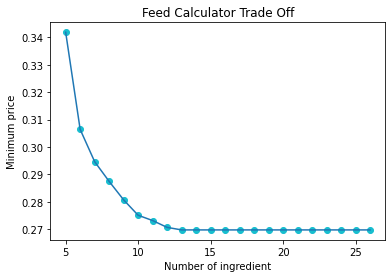

In [ ]:
plt.plot(x, y)
plt.scatter(x, y, color ='tab:cyan')
plt.ylabel('Minimum price')
plt.xlabel('Number of ingredient')
plt.title('Feed Calculator Trade Off')